In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# This will reload imports before executing code, allowing you to easily change contents of custom scripts
%load_ext autoreload
%autoreload 2

# Automatically-generated artificial data (in batches)

## ToDos

1. fix segments
    * some stays are too short _ie_ less than the thresh (sometimes shoult be ok)
    * travels 
        * some are too long $\to$ too slow!
        * some are too short $\to$ too fast!
2. fix drifting possibilities
    * when stitching segments back together, those segments 
        * should have means within the eps
        * the new seg's mean should be (will be anyways) within the eps of the others means (
            * maybe more stringent: 10% of eps?
        * the STD should not be muched changed

In [3]:
import numpy as np
import pandas as pd

In [4]:
import os, sys
sys.path.append('/home/sandm/Notebooks/stay_classification/src/')

In [5]:
# #############################################################################
%matplotlib inline
import matplotlib.pyplot as plt

## Make the artificial data: 1D1T

**note** "T" here means just the index; later, it could be considered "time"

# Sythetic data

In [6]:
from synthetic_data.trajectory import get_stay
from synthetic_data.trajectory import get_journey_path, get_segments
from synthetic_data.masking import get_mask_with_duplicates
from synthetic_data.trajectory import get_stay_segs, get_adjusted_stays
from synthetic_data.noise import get_noisy_segs, get_noisy_path, get_noise_arr
from synthetic_data.noise import get_noisy_segs, get_noisy_path, get_noise_arr
from synthetic_data.trajectory_class import get_trajectory

dsec = 1/3600.0
time = np.arange(0,24,dsec)

## Random trajectory

In [7]:
rand_range = lambda size, max_, min_: (max_-min_)*np.random.random_sample(size=size) + min_

## Suppose the number of stays in follows a log-norm. distribution

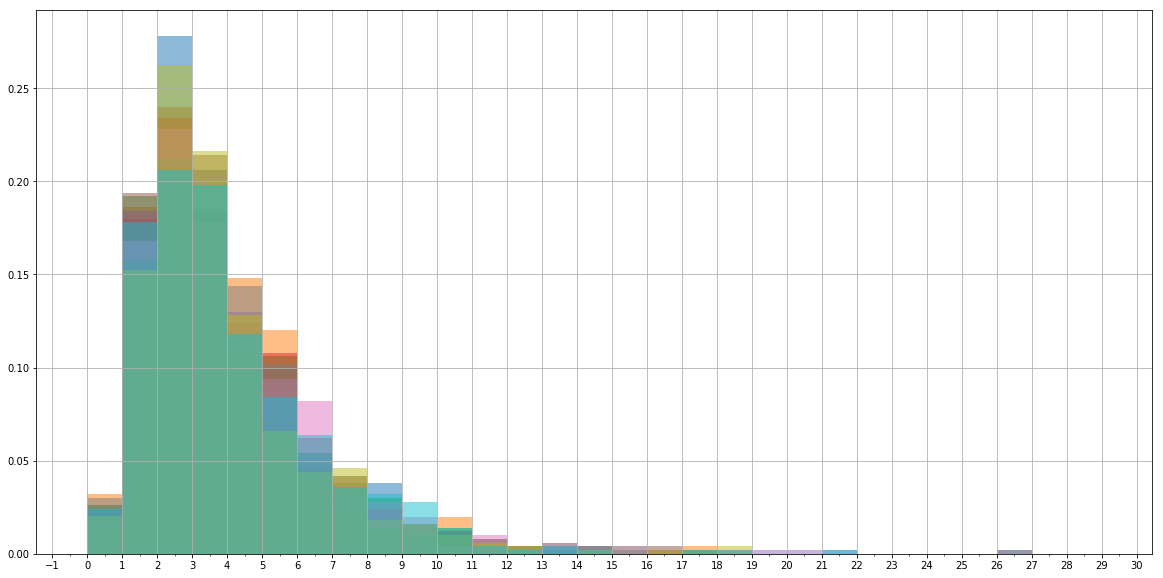

In [8]:
plt.figure(figsize=(20,10))

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
#ax.set_xticks(np.arange(0,1e7,1e6), minor=True)
# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.

for n in range(10):

    _ = plt.hist(np.random.lognormal(1.2,0.60,500),bins=np.arange(0,30,1), density=True, alpha=0.5)


ax = plt.gca()

ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(0.5))


plt.grid()

### Single trajectory

0.009476590174978435 0.08868351256676595


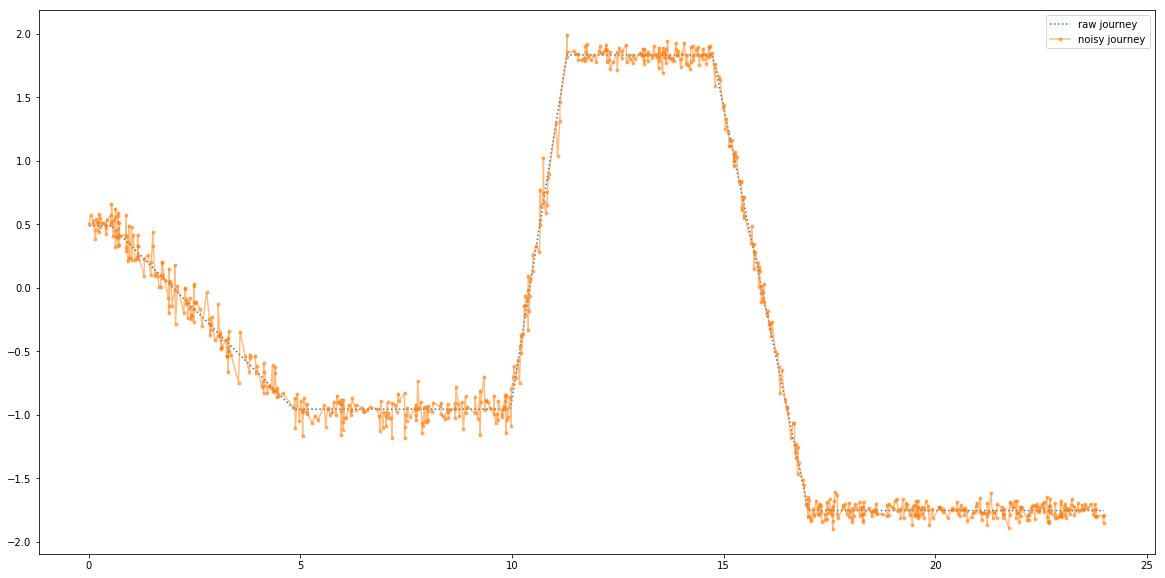

In [9]:
event_frac = rand_range(1,0.01,0.001)[0]

duplicate_frac = rand_range(1,0.3,0.05)[0]

print(event_frac, duplicate_frac)

configs = {
    'threshold':0.5,
    'event_frac':event_frac,
    'duplicate_frac':duplicate_frac,    
    'noise_min':0.02,
    'noise_max':0.15
}


nr_stays = np.random.randint(10)
stay_time_bounds = np.concatenate((np.array([0]),rand_range(2*nr_stays, 24, 0),np.array([24])))
stay_time_bounds = np.sort(stay_time_bounds)
stay_xlocs = rand_range(nr_stays+1, 2, - 2.0)

stays = []
for n in range(nr_stays+1):
    
    nn = 2*n
    stay = get_stay(stay_time_bounds[nn], stay_time_bounds[nn+1],  stay_xlocs[n])
    #print(n,nn,nn+1,stay)
    stays.append(stay)
    

time_sub, raw_journey_sub, noise_journey_sub = get_trajectory(stays, time, configs)

plt.figure(figsize=(20,10))
#plt.plot(t_segs, x_segs, ':', marker='|', color='grey', linewidth=2.0, markerfacecolor='w', markersize=30.0, markeredgewidth=1.0, dashes=[0.5,0.5], label='raw stays')

#plt.plot(new_t_segs, new_x_segs, 'ko--', linewidth=3.0, markerfacecolor='w', markersize=4.0, markeredgewidth=1.0, label='adjusted raw stays')
plt.plot(time_sub, raw_journey_sub, ':', label='raw journey')
plt.plot(time_sub, noise_journey_sub, '.-', label='noisy journey', alpha=0.5)
plt.legend();
#plt.xlim([6.2,6.6]);

In [10]:
from matplotlib.ticker import MultipleLocator

start == stop
4 {'type': 'stay', 'loc': 0.7363262138194466, 'start': 3.9501763093277447, 'end': 5.031173296574543, 'slope': 0} 
 {'type': 'stay', 'loc': 0.7363262138194466, 'start': 16.968915667942387, 'end': 20.59886706944853, 'slope': 0}


/home/sandm/Notebooks/stay_classification/src/synthetic_data/trajectory.py:133: RuntimeWarning: divide by zero encountered in double_scalars
  get_slope = lambda x1,y1,x2,y2: (y1-y2)/(x1-x2)
/home/sandm/Notebooks/stay_classification/src/synthetic_data/trajectory.py:256: RuntimeWarning: invalid value encountered in multiply
  fff[mask] = slope*(x[mask]-start) + loc


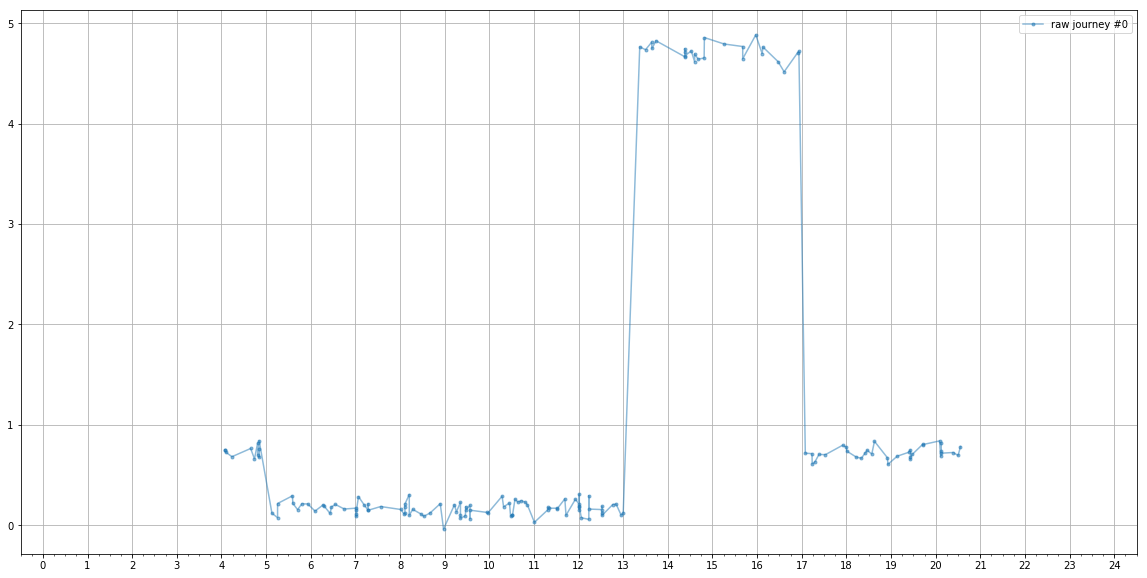

In [11]:
noisy = True

fig, ax = plt.subplots(1,1,figsize=(20,10))
#plt.plot(t_segs, x_segs, ':', marker='|', color='grey', linewidth=2.0, markerfacecolor='w', markersize=30.0, markeredgewidth=1.0, dashes=[0.5,0.5], label='raw stays')


#for m in range(10):
m = 0

event_frac = rand_range(1,0.01,0.001)[0]

duplicate_frac = rand_range(1,0.3,0.05)[0]

#print(event_frac, duplicate_frac)
configs = {
    'threshold':0.5,
    'event_frac':event_frac,
    'duplicate_frac':duplicate_frac,    
    'noise_min':0.02,
    'noise_max':0.15
}



#nr_stays = np.random.randint(10)    
p,_ = np.histogram(np.random.lognormal(1.2,0.60,500),bins=np.arange(0,30,1), density=True)
nr_stays = np.random.choice(np.arange(p.size),size=1,p=p)[0]

# Get midnight-to-midnight trajectory
m2m_flag = np.random.choice(np.arange(p.size),size=1,p=p)[0]%5 > 0
if m2m_flag:
    print('mid-to-mid')
    stay_time_bounds = np.concatenate((np.array([0]),rand_range(2*nr_stays, 24, 0),np.array([24])))
else:
    stay_time_bounds = rand_range(2*nr_stays, 24, 0)
    
stay_time_bounds = np.sort(stay_time_bounds)
stay_xlocs = rand_range(nr_stays+1, 6, - 6.0)

stays = []
for n in range(nr_stays+1):

    if m2m_flag:
        nn = 2*n
    else:
        nn = n

    stay_xloc = stay_xlocs[n]

    if n == nr_stays: 
        if np.random.choice(np.arange(p.size),size=1,p=p)[0]%2 == 0:
            print('start == stop')
            stay_xloc = stay_xlocs[0]

    stay = get_stay(stay_time_bounds[nn], stay_time_bounds[nn+1],  stay_xloc)

    #print(n,nn,nn+1,stay,abs(stay_time_bounds[nn]-stay_time_bounds[nn+1]))
    stays.append(stay)
#print(len(stays))

print(len(stays),stays[0],'\n',stays[-1])

time_sub, raw_journey_sub, noise_journey_sub = get_trajectory(stays, time, configs)

#plt.plot(new_t_segs, new_x_segs, 'ko--', linewidth=3.0, markerfacecolor='w', markersize=4.0, markeredgewidth=1.0, label='adjusted raw stays')
if noisy:
    ax.plot(time_sub, noise_journey_sub, '.-', label=f'raw journey #{m}', alpha=0.5)
else:
    ax.plot(time_sub, raw_journey_sub, ':', label=f'raw journey #{m}')

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))

plt.legend();
#plt.xlim([6.2,6.6]);
plt.xlim([-0.5,24.5])
plt.grid();

## Plot the results

#### TODO: bug fix

```
/home/sandm/Notebooks/stay_classification/src/synthetic_data/trajectory.py:162: UserWarning: the distance between the consecutive locations is within the threshold 0.5
  warnings.warn(f"the distance between the consecutive locations is within the threshold {threshold}")

---------------------------------------------------------------------------
---> 62     time_sub, raw_journey_sub, noise_journey_sub = get_trajectory(stays, time, configs)
---> 43     new_stays = get_adjusted_stays(segments, time_sub)
--> 351             new_t0, new_t1 = np.min(subarr),np.max(subarr)
```
Leads to
```
ValueError: zero-size array to reduction operation minimum which has no identity
```


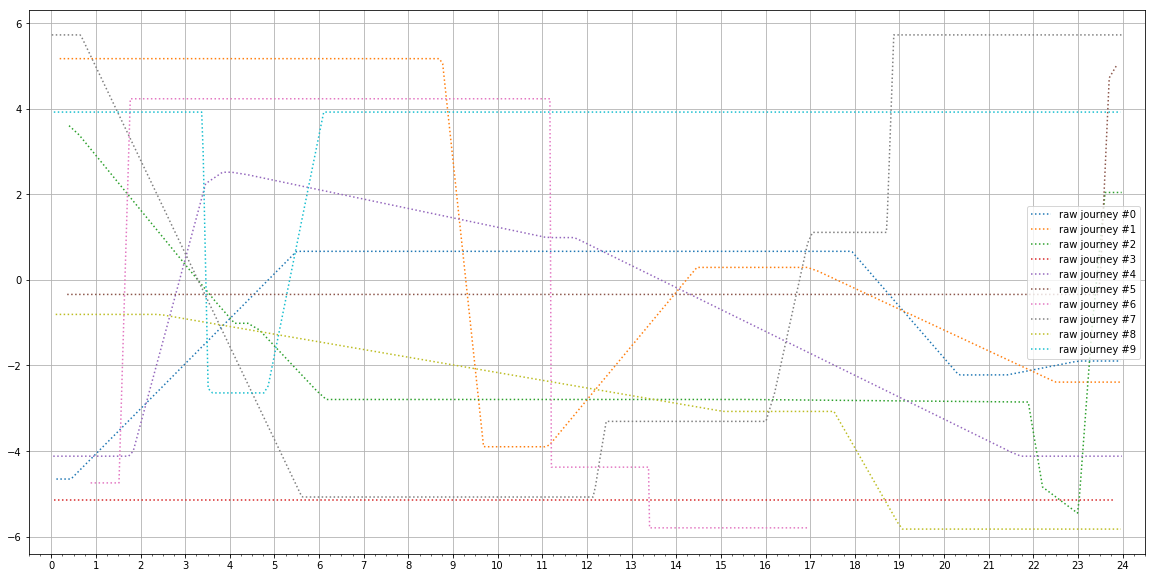

In [13]:
noisy = False

fig, ax = plt.subplots(1,1,figsize=(20,10))
#plt.plot(t_segs, x_segs, ':', marker='|', color='grey', linewidth=2.0, markerfacecolor='w', markersize=30.0, markeredgewidth=1.0, dashes=[0.5,0.5], label='raw stays')


for m in range(10):

    event_frac = rand_range(1,0.01,0.001)[0]

    duplicate_frac = rand_range(1,0.3,0.05)[0]

    #print(event_frac, duplicate_frac)
    configs = {
        'threshold':0.5,
        'event_frac':event_frac,
        'duplicate_frac':duplicate_frac,    
        'noise_min':0.02,
        'noise_max':0.15
    }

    

    #nr_stays = np.random.randint(10)    
    p,_ = np.histogram(np.random.lognormal(1.2,0.60,500),bins=np.arange(0,30,1), density=True)
    nr_stays = np.random.choice(np.arange(p.size),size=1,p=p)[0]

    
    # Get midnight-to-midnight trajectory (set to 80% --> 80% should have mid-to-mid)
    # TODO: adjust this so that the end points can also start/end at 00:00/23:59 independently
    m2m_flag = np.random.choice(np.arange(p.size),size=1,p=p)[0]%5 > 0
    if m2m_flag:
        stay_time_bounds = np.concatenate((np.array([0]),rand_range(2*nr_stays, 24, 0),np.array([24])))
    else:
        stay_time_bounds = rand_range(2*nr_stays, 24, 0)
        
    stay_time_bounds = np.sort(stay_time_bounds)
    stay_xlocs = rand_range(nr_stays+1, 6, - 6.0)

    stays = []
    for n in range(nr_stays+1):

        if m2m_flag:
            nn = 2*n
        else:
            nn = n
        
        stay_xloc = stay_xlocs[n]
        
        if n == nr_stays: 
            if np.random.choice(np.arange(p.size),size=1,p=p)[0]%2 == 0:
                stay_xloc = stay_xlocs[0]


        stay = get_stay(stay_time_bounds[nn], stay_time_bounds[nn+1],  stay_xloc)
        
        #print(n,nn,nn+1,stay,abs(stay_time_bounds[nn]-stay_time_bounds[nn+1]))
        stays.append(stay)

    #print(len(stays))

    time_sub, raw_journey_sub, noise_journey_sub = get_trajectory(stays, time, configs)

    #plt.plot(new_t_segs, new_x_segs, 'ko--', linewidth=3.0, markerfacecolor='w', markersize=4.0, markeredgewidth=1.0, label='adjusted raw stays')
    if noisy:
        ax.plot(time_sub, noise_journey_sub, '.-', label=f'raw journey #{m}', alpha=0.5)
    else:
        ax.plot(time_sub, raw_journey_sub, ':', label=f'raw journey #{m}')

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))        

plt.legend();
#plt.xlim([6.2,6.6]);
plt.xlim([-0.5,24.5])
plt.grid();